# Tests of Karun's Stripe 82 recalibration files 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

 ## Data Structures
Given a local directory for data files (one per Stripe82 run), e.g.  <br>
runsDataDir = "/Users/ivezic/DataKarun/1009_MatchCatDir",  <br>
files with magnitude offsets are organized in 6 subdirectories, 
e.g. (see the code below) <br>
magoffFile = runsDataDir/1009_MatchCatDir/1/MagOffs.dat <br>
and list all fields from that run/camCol. 
 

In [2]:
runsDataDir = "/Users/ivezic/DataKarun" 
run = 1009
runDataDir = "%s/%04d_MatchCatDir" % (runsDataDir, run)
camcol = 1 
datafile = "%d/MagOffs.dat" % (camcol)
magOffFile = "%s/%s" % (runDataDir,datafile)
print magOffFile

/Users/ivezic/DataKarun/1009_MatchCatDir/1/MagOffs.dat


## MagOffs.dat files 

These files list magnitude offsets in each of the five filters, one line per field. <br>
The magnitude offset for each filter is computed as the difference between the standard 
star mag (the median mag given in Standard Star Catalog) and the psf mag of the corresponding 
matched object from the given run. <br>

Each line lists first matched photometric catalog name for this field, the number of objects
in that field, the number of objects matched to standard stars (within 5 arcsec) and then in 
the ugriz order: (mjd, mjdfrac, meanOff, sigma, medOff, iqd, wmu, wmuerr)

In [3]:
# first we read the number of objects and the number of matched standard stars
data = np.loadtxt(magOffFile, usecols=(1, 2), unpack=True) 
Nobjects = data[0]
Nmatched = data[1] 

In [12]:
# and then we loop over all 5 bandpasses 
# indices 0-4 map to ('u', 'g', 'r', 'i', 'z')
filter = {'u': 0, 'g':1, 'r':2, 'i':3, 'z':4}
# and quantities
Q = {'mjd':0, 'mjdfrac':1, 'meanOff':2, 'sigma':3, 'medOff':4, 'iqd':5, 'wmu':6, 'wmuerr':7}
data = []
for f in range (0,5):
    colOffset = 3 + f*8
    useCols = range(colOffset,colOffset+8)
    fdata = np.loadtxt(magOffFile, usecols=useCols, unpack=True) 
    data.append(np.array(fdata))

In [13]:
def printStats(v):
    print v
    print 'Size:', np.size(v)
    print 'min:', np.min(v)
    print 'max:', np.max(v)
    print 'mean:', np.mean(v)
    print 'median:', np.median(v)
    print 'st.dev.:', np.std(v) 

In [25]:
ff = 'u'
time = data[filter[ff]][Q['mjdfrac']]
offset = data[filter[ff]][Q['wmu']]
offsetErr = data[filter[ff]][Q['wmuerr']]
maxAllowed = 0.2 
std = np.std(offset[np.abs(offset)<maxAllowed])
print 'standard deviation:', std
chi2 = np.std((offset[np.abs(offset)<maxAllowed]/offsetErr[np.abs(offset)<maxAllowed])) 
print 'chi2:', chi2
#printStats(offset)
#printStats(offsetErr)

standard deviation: 0.0388349585362
chi2: 9.52576381035


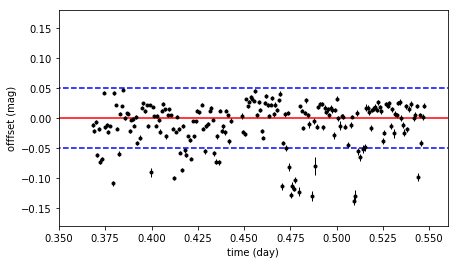

In [29]:
# plot data
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.5, 0.7, 0.45, 0.25])
ax.errorbar(time, offset, offsetErr, fmt='.', lw=1, c='k')
ax.set_xlim(0.35, 0.56)
ax.set_ylim(-0.18, 0.18)
ax.set_xlabel('time (day)')
ax.set_ylabel(r'offfset (mag)')
ax.plot([0,1], [0.0, 0.0], '-k', c='red')
ax.plot([0,1], [-0.05, -0.05], '--', c='blue')
ax.plot([0,1], [0.05, 0.05], '--', c='blue')
plt.show()

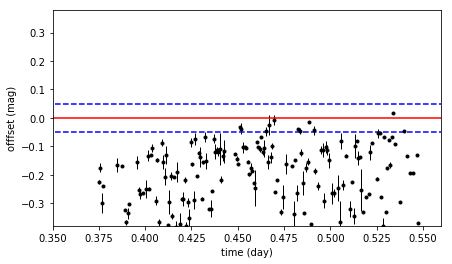

In [28]:
# repeat with median offsets 
offset2 = data[filter[ff]][Q['medOff']]
offsetStd = data[filter[ff]][Q['iqd']]  
offsetErr2 = offsetStd / np.sqrt(Nmatched)

# plot 
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.5, 0.7, 0.45, 0.25])
ax.errorbar(time, offset2, offsetErr2, fmt='.', lw=1, c='k')
ax.set_xlim(0.35, 0.56)
ax.set_ylim(-0.38, 0.38)
ax.set_xlabel('time (day)')
ax.set_ylabel(r'offfset (mag)')
ax.plot([0,1], [0.0, 0.0], '-k', c='red')
ax.plot([0,1], [-0.05, -0.05], '--', c='blue')
ax.plot([0,1], [0.05, 0.05], '--', c='blue')
plt.show()

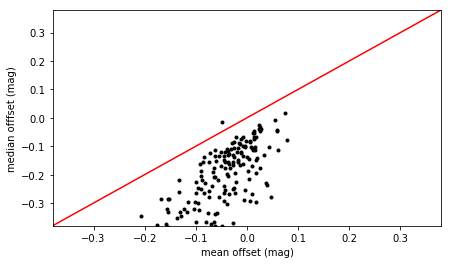

In [39]:
ff = 'u'
offset1 = data[filter[ff]][Q['meanOff']]
offset2 = data[filter[ff]][Q['medOff']]
# plot 
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.5, 0.7, 0.45, 0.25])
ax.errorbar(offset1, offset2, 0*offset2, fmt='.', lw=1, c='k')
ax.set_xlim(-0.38, 0.38)
ax.set_ylim(-0.38, 0.38)
ax.set_xlabel(r'mean offset (mag)')
ax.set_ylabel(r'median offfset (mag)')
ax.plot([-1,1], [-1, 1], '-k', c='red')
plt.show()


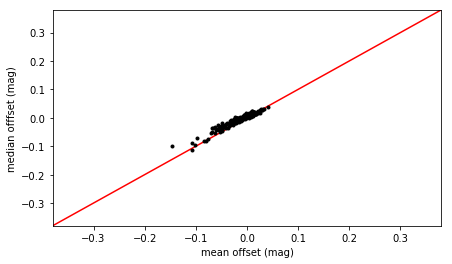

In [40]:
ff = 'g'
offset1 = data[filter[ff]][Q['meanOff']]
offset2 = data[filter[ff]][Q['medOff']]
# plot 
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.5, 0.7, 0.45, 0.25])
ax.errorbar(offset1, offset2, 0*offset2, fmt='.', lw=1, c='k')
ax.set_xlim(-0.38, 0.38)
ax.set_ylim(-0.38, 0.38)
ax.set_xlabel(r'mean offset (mag)')
ax.set_ylabel(r'median offfset (mag)')
ax.plot([-1,1], [-1, 1], '-k', c='red')
plt.show()

